## Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist
from random import random

In [2]:
seed = 1

## Visualizing a centroid

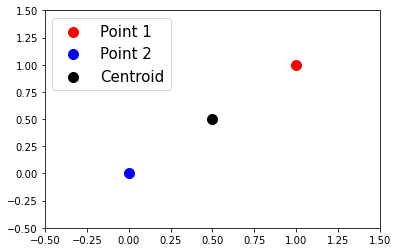

In [38]:
a = [1,1]
b = [0,0]
plt.scatter(a[0],a[1],s = 100,color = 'r',label = 'Point 1')
plt.scatter(b[0],b[1],s = 100,color = 'b', label = 'Point 2')
## centroid
cen_x = (a[0]+b[0])/2
cen_y = (a[1]+b[1])/2
plt.scatter(cen_x,cen_y,s = 100,color = 'k', label ='Centroid')
plt.legend(prop = {'size':15})
plt.xlim([-0.5,1.5])
plt.ylim([-0.5,1.5])
plt.show()

## Making toy dataset for clustering

In [5]:
center = 3
X,y = make_blobs(n_samples=200,n_features=2, centers = center, cluster_std=1.5)
print(X.shape)
print(y.shape)

(200, 2)
(200,)


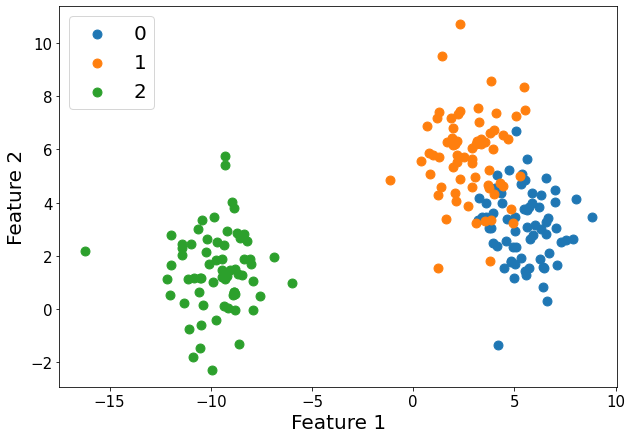

In [6]:
fig = plt.figure(figsize=(10,7))
for i in range(center):
    plt.scatter(X[y == i,0],X[y == i,1],s =80, label = str(i))
plt.legend(prop = {'size':20})
plt.xlabel('Feature 1', size = 20)
plt.ylabel('Feature 2', size = 20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

## What we see vs what algorithm sees

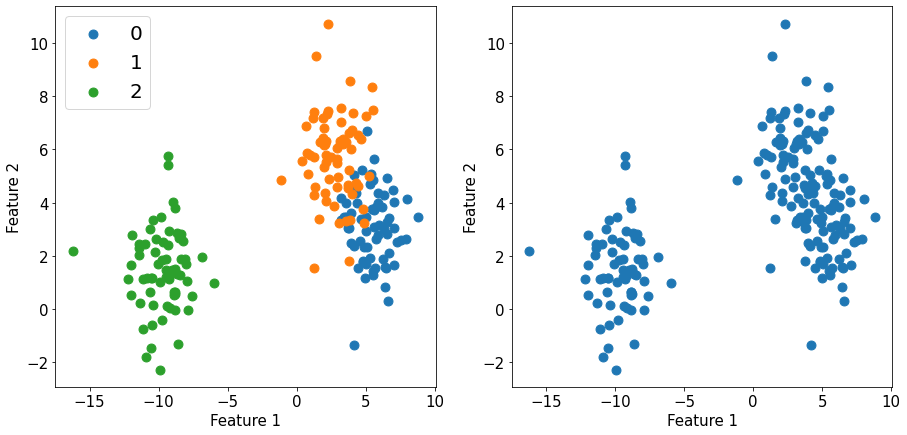

In [7]:
fig = plt.figure(figsize=(15,7))

ax = fig.add_subplot(1,2,1)

for i in range(center):
    plt.scatter(X[y == i,0],X[y == i,1],s =80, label = str(i))
plt.legend(prop = {'size':20})
ax.set_xlabel('Feature 1', size = 15)
ax.set_ylabel('Feature 2', size = 15)
plt.xticks(size=15)
plt.yticks(size=15)
#ax.grid(True)

ax = fig.add_subplot(1,2,2)

ax.scatter(X[:,0],X[:,1],s =80, label = 'Data')
ax.set_xlabel('Feature 1', size = 15)
ax.set_ylabel('Feature 2', size = 15)
plt.xticks(size=15)
plt.yticks(size=15)
#ax.grid(True)
plt.show()

## Step 1: Specify Number of Clusters

In [8]:
K = 3

## Step 2: Get the initial centroids

Shuffle the dataset and select K datapoints randomly without replacement as initial centroids

In [9]:
## K random indices for K centroids
ind = np.random.choice(len(y),K,replace=False)

In [10]:
ind

array([10, 47, 16])

In [11]:
cx = X[ind,:]
cy = y[ind]

### Visualizing the data and the centroid

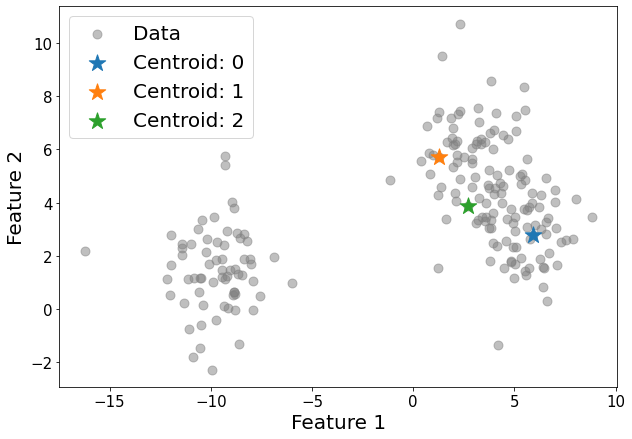

In [12]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(X[:,0],X[:,1],s =80,color = 'grey',alpha = 0.5,label = 'Data')
ax.set_xlabel('Feature 1', size = 20)
ax.set_ylabel('Feature 2', size = 20)
plt.xticks(size=15)
plt.yticks(size=15)

for i in range(K):
    ax.scatter(cx[i,0],cx[i,1],s = 300,marker = '*',label = 'Centroid: '+str(i))

plt.legend(prop = {'size':20})
plt.show()

### Step 3: Keep iterating until there is no change in centroid

### Iteration 1

####  3.1 and 3.2

In [13]:
Y = cdist(X, cx, 'euclidean') ## computing the distance
assign = np.argsort(Y)[:,0]

In [14]:
assign

array([1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0,
       1, 1, 1, 0, 0, 2, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 0, 2,
       1, 2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 0,
       1, 2, 1, 0, 0, 1, 2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1,
       1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1,
       1, 0])

In [15]:
cluster = {}
for i in range(K):
    cluster[i] = []

for i in range(len(Y)):
    cluster[assign[i]].append(X[i,:])

for i in range(K):
    cluster[i] = np.array(cluster[i])

#### Plotting

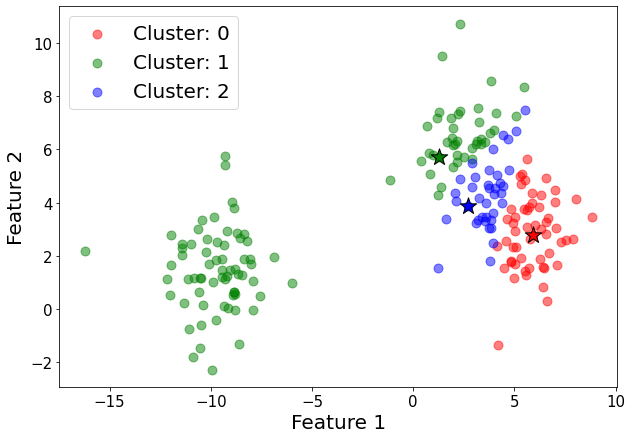

In [16]:
## Plotting the clusters with current centroids
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)


colors = ['r','g','b']
for i in range(K):
    ax.scatter(cluster[i][:,0],cluster[i][:,1],s =80, color = colors[i],alpha = 0.5,label = 'Cluster: '+str(i))
    ax.scatter(cx[i,0],cx[i,1],s = 300,marker = '*', edgecolors='k',color = colors[i])
        

ax.legend(prop = {'size':20})
ax.set_xlabel('Feature 1', size = 20)
ax.set_ylabel('Feature 2', size = 20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

#### 3.3: Getting the new centroid and plotting

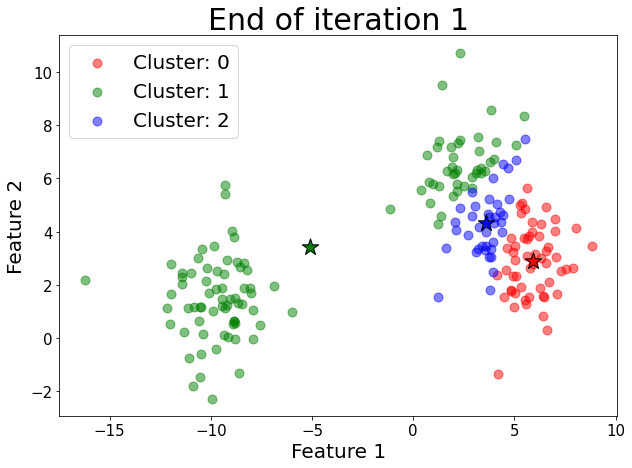

In [17]:
## Getting new centroids
for i in cluster:
    cx[i,0] = np.mean(cluster[i][:,0])
    cx[i,1] = np.mean(cluster[i][:,1])

### Plotting the new centroids with clusters
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)


color = ['r','g','b']
for i in range(K):
    ax.scatter(cluster[i][:,0],cluster[i][:,1],s =80, color = colors[i],alpha = 0.5,label = 'Cluster: '+str(i))
    ax.scatter(cx[i,0],cx[i,1],s = 300,marker = '*', edgecolors='k',color = colors[i])
        

ax.legend(prop = {'size':20})
ax.set_xlabel('Feature 1', size = 20)
ax.set_ylabel('Feature 2', size = 20)
plt.xticks(size=15)
plt.yticks(size=15)

ax.set_title('End of iteration 1',size = 30)
plt.show()

### Iteration 2

####  3.1 and 3.2

In [18]:
Y = cdist(X, cx, 'euclidean') ## computing the distance
assign = np.argsort(Y)[:,0]

cluster = {}
for i in range(K):
    cluster[i] = []

for i in range(len(Y)):
    cluster[assign[i]].append(X[i,:])

for i in range(K):
    cluster[i] = np.array(cluster[i])

#### 2.2: Plotting

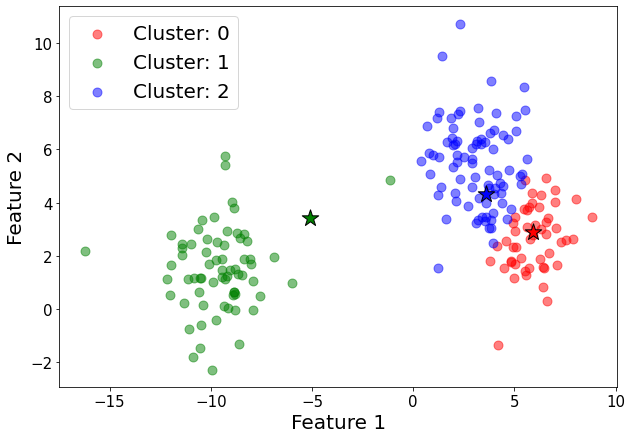

In [19]:
## Plotting the clusters with current centroids
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)


color = ['r','g','b']
for i in range(K):
    ax.scatter(cluster[i][:,0],cluster[i][:,1],s =80, color = colors[i],alpha = 0.5,label = 'Cluster: '+str(i))
    ax.scatter(cx[i,0],cx[i,1],s = 300,marker = '*', edgecolors='k',color = colors[i])
        

ax.legend(prop = {'size':20})
ax.set_xlabel('Feature 1', size = 20)
ax.set_ylabel('Feature 2', size = 20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

#### 3.3: Getting the new centroid and plotting

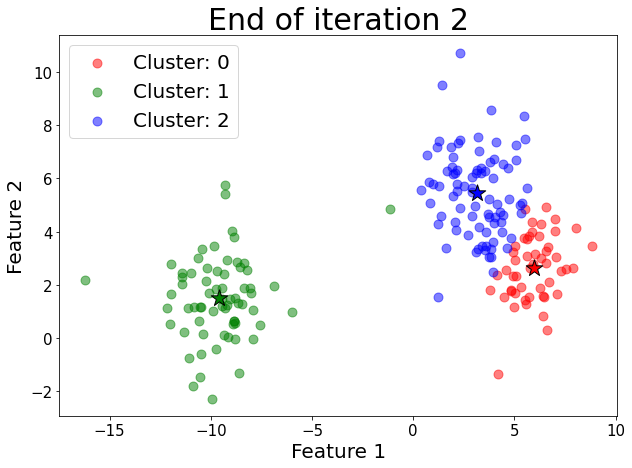

In [20]:
## Getting new centroids
for i in cluster:
    cx[i,0] = np.mean(cluster[i][:,0])
    cx[i,1] = np.mean(cluster[i][:,1])

### Plotting the new centroids with clusters
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)


color = ['r','g','b']
for i in range(K):
    ax.scatter(cluster[i][:,0],cluster[i][:,1],s =80, color = colors[i],alpha = 0.5,label = 'Cluster: '+str(i))
    ax.scatter(cx[i,0],cx[i,1],s = 300,marker = '*', edgecolors='k',color = colors[i])
        

ax.legend(prop = {'size':20})
ax.set_xlabel('Feature 1', size = 20)
ax.set_ylabel('Feature 2', size = 20)
plt.xticks(size=15)
plt.yticks(size=15)

ax.set_title('End of iteration 2',size = 30)
plt.show()

## Including a loop to avoid writing each iteration separately

### Step 1: Normalize the dataset

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
X_norm = scaler.fit_transform(X)

In [23]:
## WHat algorithm sees

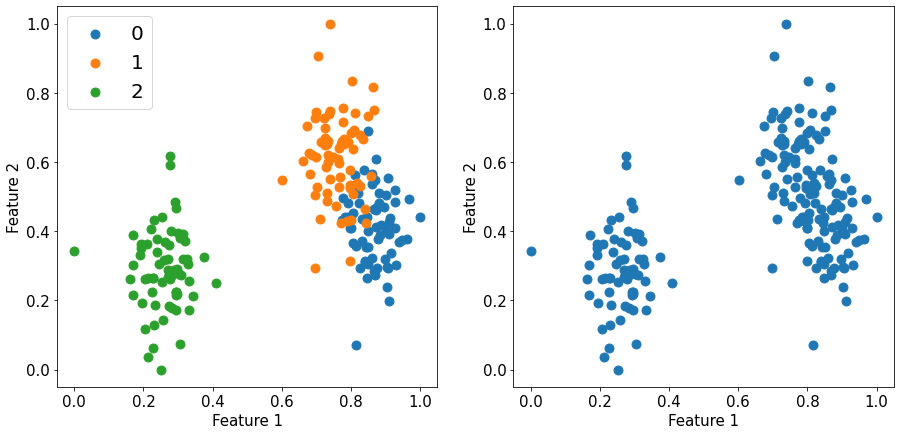

In [24]:
fig = plt.figure(figsize=(15,7))

ax = fig.add_subplot(1,2,1)

for i in range(center):
    plt.scatter(X_norm[y == i,0],X_norm[y == i,1],s =80, label = str(i))
plt.legend(prop = {'size':20})
ax.set_xlabel('Feature 1', size = 15)
ax.set_ylabel('Feature 2', size = 15)
plt.xticks(size=15)
plt.yticks(size=15)
#ax.grid(True)

ax = fig.add_subplot(1,2,2)

ax.scatter(X_norm[:,0],X_norm[:,1],s =80, label = 'Data')
ax.set_xlabel('Feature 1', size = 15)
ax.set_ylabel('Feature 2', size = 15)
plt.xticks(size=15)
plt.yticks(size=15)
#ax.grid(True)
plt.show()

### Step 2: Iterate over steps of K-means clustering

In [25]:
cluster[0].shape

(50, 2)

In [26]:
# Specifying number of clusters
K =3
# Initializing K centroids randomly
ind = np.random.choice(len(y),K,replace = False)

cx_current = X_norm[ind,:]
cx_updated = X_norm[ind,:]*100

## STEP 3: writing the loop
tol = 1.0e-5
iteration = 0
while sum(np.diag(cdist(cx_current,cx_updated, 'euclidean')))>tol:
    
    if iteration > 0:
        ## Making the updated clusters as the current clusters
        cx_current = cx_updated.copy()
    
    ## Reassigning Clusters
    Y = cdist(X_norm, cx_current, 'euclidean') ## computing the distance
    assign = np.argsort(Y)[:,0]
    cluster = {}
    for i in range(K):
        cluster[i] = []

    for i in range(len(Y)):
        cluster[assign[i]].append(X_norm[i,:])

    for i in range(K):
        cluster[i] = np.array(cluster[i])
        
    ## Reassigning centroids
    for i in cluster:
        cx_updated[i,0] = np.mean(cluster[i][:,0])
        cx_updated[i,1] = np.mean(cluster[i][:,1])
        
    iteration += 1

In [27]:
iteration

6

In [28]:
len(cluster)

3

### Stept 3: Plotting the result

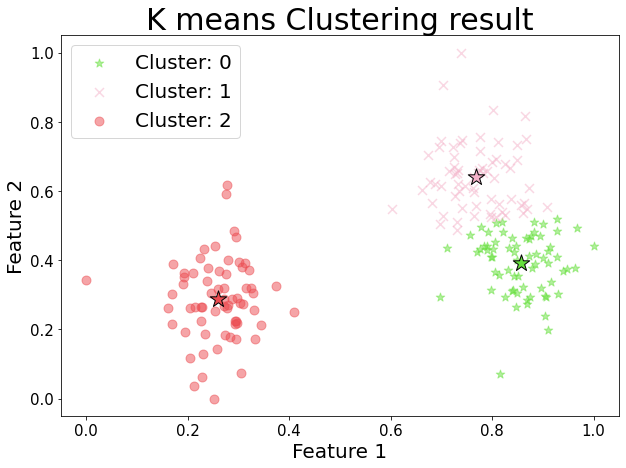

In [29]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)


colors = colors = [(random(),random(),random()) for _ in range(K)]
markers = ['*','x','o']
for i in range(K):
    ax.scatter(cluster[i][:,0],cluster[i][:,1],s =80, marker = markers[i], color = colors[i],alpha = 0.5,label = 'Cluster: '+str(i))
    ax.scatter(cx_updated[i,0],cx_updated[i,1],s = 300,marker = '*', edgecolors='k',color = colors[i])
        

ax.legend(prop = {'size':20})
ax.set_xlabel('Feature 1', size = 20)
ax.set_ylabel('Feature 2', size = 20)
plt.xticks(size=15)
plt.yticks(size=15)

ax.set_title('K means Clustering result',size = 30)
plt.show()

In [30]:
len(cluster[0]),len(cluster[1]),len(cluster[2])

(68, 66, 66)

### WCSS and using KMeans from Sklearn

In [31]:
from sklearn.cluster import KMeans

In [32]:
wcss = []
for i in range(1,len(X_norm)+1):
    kmeans = KMeans(init = 'k-means++', n_clusters=i).fit(X_norm)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_) #kmeans inertia_ attribut:  Sum of squared distances of 
                                    #samples to their cluster center.

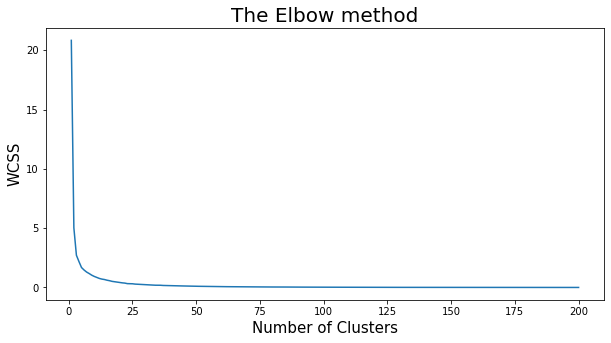

In [33]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(1,len(X)+1),wcss)
ax.set_xlabel('Number of Clusters',size = 15)
ax.set_ylabel('WCSS',size = 15)
ax.set_title('The Elbow method',size = 20)
plt.show()

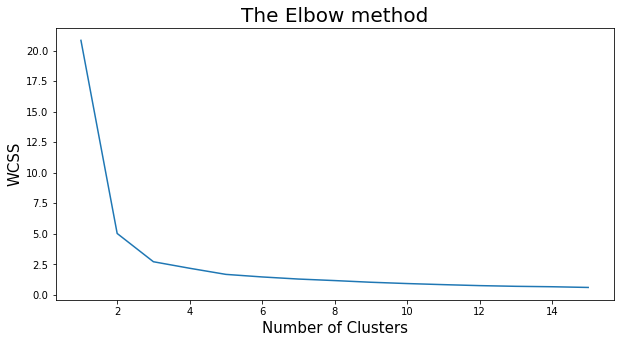

In [34]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(1,len(X)+1)[:15],wcss[:15])
ax.set_xlabel('Number of Clusters',size = 15)
ax.set_ylabel('WCSS',size = 15)
ax.set_title('The Elbow method',size = 20)
plt.show()

Visualizing the above plot. Optimal number of clusters = 3